# Representing Dats and Feature Engineering

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 3.7.0 (default, Aug 22 2018, 15:22:33) 
[Clang 9.1.0 (clang-902.0.39.2)]


pandas version: 0.23.4
matplotlib version: 2.2.3
numpy version: 1.15.1
scipy version: 1.1.0
IPython version: 6.5.0


scikit-learn version: 0.19.2


## * Categorical Features (Discrete Feature)

#### adult dataset to predict annual income

In [2]:
data = pd.read_csv('~/Desktop/Coding/ML/IntroToMLwithPython/data/adult.csv')
data.head(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
import os

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
    header=None, index_col=False,
    names=['age', 'workclass', 'nflwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

# Choose some columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head(10)

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


##### one-hot-encoding

* pandas에서 get_dummies 함수는 객체 타입(like String)이나 범주형을 가진 열을 자동으로 변환해줌

In [5]:
print("Original Features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original Features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
data_dummies.head(10)

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,37,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,49,16,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7,52,45,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,31,50,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,42,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


* Extract every columns from age to occupation_ Transport-moving, which include feature

In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract Numpy Array
x = features.values
y = data_dummies['income_ >50K'].values
print("x.shape: {}\ny.shape: {}".format(x.shape, y.shape))
features.head()

x.shape: (32561, 44)
y.shape: (32561,)


,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,38,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,40,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
print("Test Score: {:.2f}".format(logreg.score(x_test, y_test)))

Test Score: 0.81


#### * Categorical Features in Numbers

In [9]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듦
demo_df = pd.DataFrame({'Number Feature': [0, 1, 2, 1], 'Categorical Feature': ['Socks', 'Fox', 'Socks', 'Box']})
demo_df

,Number Feature,Categorical Feature
0,0,Socks
1,1,Fox
2,2,Socks
3,1,Box


In [10]:
pd.get_dummies(demo_df)

,Number Feature,Categorical Feature_Box,Categorical Feature_Fox,Categorical Feature_Socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


* get_dummies 함수는 문자열 특성만 인코딩되며, 숫자 특성은 바뀌지 않음

In [11]:
demo_df['Number Feature'] = demo_df['Number Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Number Feature', 'Categorical Feature'])

,Number Feature_0,Number Feature_1,Number Feature_2,Categorical Feature_Box,Categorical Feature_Fox,Categorical Feature_Socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


* 숫자 특성도 가변수로 만들기 위해선, columns 매개변수에 인코딩하고 싶은 열 명시

## dd

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


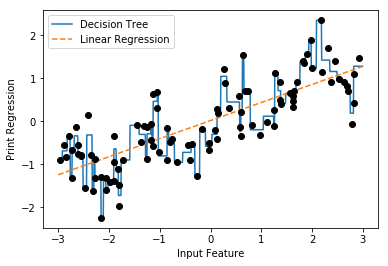

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

x, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(x, y)
plt.plot(line, reg.predict(line), label='Decision Tree')

reg = LinearRegression().fit(x, y)
plt.plot(line, reg.predict(line), '--', label="Linear Regression")

plt.plot(x[:, 0], y , 'o', c='k')
plt.ylabel("Print Regression")
plt.xlabel("Input Feature")
plt.legend(loc="best")

##### * Binning

In [13]:
bins = np.linspace(-3, 3, 11)
print("bin: {}".format(bins))

bin: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [14]:
which_bin = np.digitize(x, bins=bins)
print("\nData Point:\n", x[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


Data Point:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


* wave 데이터셋에 있는 연속성 특성을 각 데이터 포인트가 어느 구간에 속했는지로 인코딩한 범주형 특성으로 변환
* 이 데이터에 scikit-learn 모델을 적용하기 위해 OneHotEncoder로 변환

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾는다.
encoder.fit(which_bin)

# one-hot-encoding으로 변환
x_binned = encoder.transform(which_bin)
print(x_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
print("x_binned.shape: {}".format(x_binned.shape))

x_binned.shape: (100, 10)


* one-hot-encoding된 데이터로 선형 회귀 모델과 결정 트리 모델을 만듦

Text(0.5,0,'Input Feature')

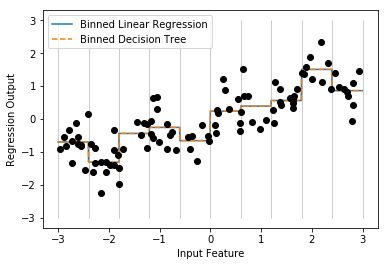

In [17]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), label='Binned Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(x_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='Binned Decision Tree')
plt.plot(x[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")

##### * 구간으로 나뉜 특성에 적용한 선형 회귀와 결정 트리 회귀의 비교
* 선형 회귀 모델과 결정 트리가 같은 예측을 만들어냄


### * Interaction and Polynomial

In [18]:
x_combined = np.hstack([x, x_binned])
print(x_combined.shape)

(100, 11)


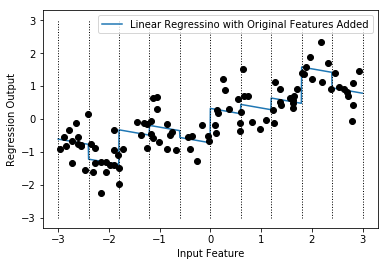

In [21]:
reg = LinearRegression().fit(x_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='Linear Regressino with Original Features Added')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
plt.legend(loc="best")
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(x[:, 0], y, 'o', c='k')

##### * 구간으로 분할된 하나의 기울기를 사용한 선형 회귀

* 각 구간의 절편과 기울기를 학습
* 학습된 기울기는 음수이고, 모든 구간에서 동일 (x축 특성이 하나이므로 기울기도 하나)

In [20]:
x_product = np.hstack([x_binned, x * x_binned])
print(x_product.shape)

(100, 20)


* Dataset now has 20 Features (데이터 포인트가 속한 구간 + 이 구간에 원본 특성을 곱한 값)
* 구간 안에서는 원본 특성이고 다른 곳에서는 0

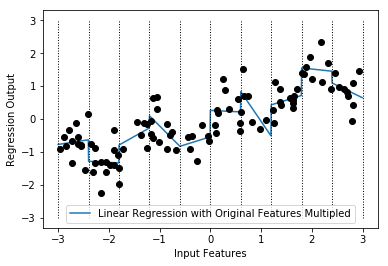

In [22]:
reg = LinearRegression().fit(x_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='Linear Regression with Original Features Multipled')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
    
plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc="best")

##### * 구간별 기울기가 다른 선형회귀

#### 원본 특성에 다항실을 추가하는 방법에 대해 알아봅시다!!
* 특성 x에 대해 x**2, x**3, x**4 등을 시도해보죠!
* 이 방식은 preprocessing module 내에 PolynomialFeatures에 구현됨

In [24]:
from sklearn.preprocessing import PolynomialFeatures
# x ** 10 까지의 고차항 추가
# 기본값인 "include_bias=True"는 절편을 위해 값이 1인 특성 추가
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(x)
x_poly = poly.transform(x)

# 10차원을 사용했으므로 10개의 특성이 만들어짐
print("x_poly.shape: {}".format(x_poly.shape))

x_poly.shape: (100, 10)


In [25]:
# x와 x_poly의 값 비교
print("x Element:\n{}".format(x[:5]))
print("x_poly Element:\n{}".format(x_poly[:5]))

x Element:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
x_poly Element:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [26]:
# get_feature_names 메서드를 사용해 특성의 의미 확인
print("Name of Each expression:\n{}".format(poly.get_feature_names()))

Name of Each expression:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


##### * Polynomial Regression: 다항식 특성을 선형 모델과 함께 사용

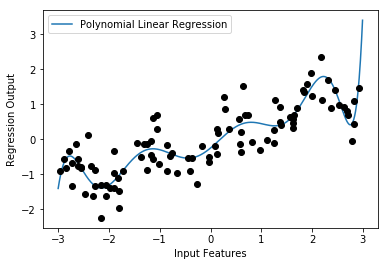

In [28]:
reg = LinearRegression().fit(x_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Polynomial Linear Regression')
plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc="best")

##### * 10차 다항식을 이용한 선형 회귀

### * Apply Kernel SVM to compare

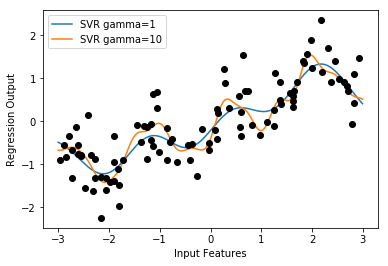

In [29]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(x, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc="best")

##### * RBF 커널 SVM의 gamma 매개변수 변화에 따른 비교

### # 보스턴 주택 가격 데이터셋에 적용시켜봅시다!

In [32]:
# Scale our data into [0, 1]
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# Scale Data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
poly = PolynomialFeatures(degree=2).fit(x_train_scaled)
x_train_poly = poly.transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
print("x_train.shape: {}".format(x_train.shape))
print("x_train_poly.shape: {}".format(x_train_poly.shape))

x_train.shape: (379, 13)
x_train_poly.shape: (379, 105)


* 2차 (degree == 2)
* 기존 13개의 특성 -> 105개의 교차 특성으로 확장
* 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱

In [34]:
print("Name of Polynomial Features:\n{}".format(poly.get_feature_names()))

Name of Polynomial Features:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


* 상호작용 특성이 있는 데이터와 없는 데이터에 대해 Ridge를 사용해 성능 비교

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(x_test_scaled, y_test)))

ridge = Ridge().fit(x_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(x_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


* Random Forest를 사용해 성능 비교

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(x_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(x_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(x_train_poly, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(x_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795


상호작용 특성이 없을 때 점수: 0.773


## 일변량 비선형 변환

* log, exp, sin 등의 초월함수 적용
* sin, cos 함수는 주기적인 패턴이 들어있는 데이터를 다룰 때 용이
* log, exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 사용

In [38]:
rnd = np.random.RandomState(0)
x_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

x = rnd.poisson(10 * np.exp(x_org))
y = np.dot(x_org, w)
print(x[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [39]:
print("특성 출현 횟수:\n{}".format(np.bincount(x[:, 0])))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5,0,'Value')

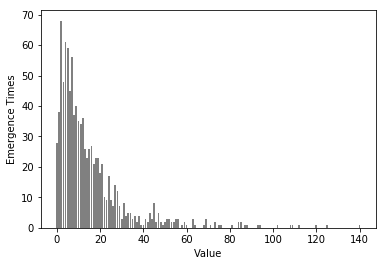

In [43]:
bins = np.bincount(x[:, 0])
plt.bar(range(len(bins)), bins, color='gray')
plt.ylabel("Emergence Times")
plt.xlabel("Value")

* x[0] 특성 값의 히스토그램


In [42]:
# 위의 데이터에 Ridge Regression 적용
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
score = Ridge().fit(x_train, y_train).score(x_test, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.622


* 점수가 낮다 -> Ridge는 x와 y의 관계를 제대로 모델링하지 못함
* Log Scale로 변환

Text(0.5,0,'Value')

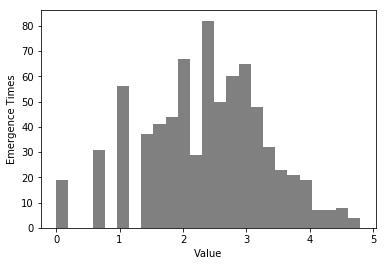

In [45]:
x_train_log = np.log(x_train + 1)
x_test_log = np.log(x_test + 1)

plt.hist(x_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Emergence Times")
plt.xlabel("Value")

In [46]:
score = Ridge().fit(x_train_log, y_train).score(x_test_log, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.875


## 특성 자동 선택

* 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 버림
##### * Univariate Statistics (변량 통계)
##### * Model-Based Selection (모델 기반 선택)
##### * Iterative Selection (반복적 선택) 

### * Univariate Statistics (변량 통계)

* 분류에서는 ANOVA (Analysis of Variance, 분산 분석) 라고도 부름
* 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산
* 일변량, 즉 각 특성이 독립적으로 평가됨

* 특성 개수가 80 -> 40 으로 줆
* get_support를 사용해 어떤 특성이 선택되었는지 확인

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Feature Number')

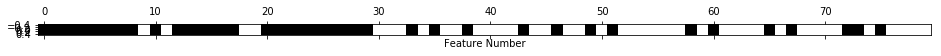

In [52]:
mask = select.get_support()
print(mask)
# Black for True, White for False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Number")

* 선택된 특성의 대부분은 원본 특성

##### * 전체 특성을 이용했을 때와 선택된 특성만 사용했을 때의 Logistic Regression 성능 비교

In [55]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
x_test_selected = select.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(x_test, y_test)))
lr.fit(x_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(lr.score(x_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### * Model-Based Selection (모델 기반 선택)

* 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해 가장 중요한 특성들만 선택
* feature_importances_ 속성을 사용: 각 특성의 중요도가 담겨 있다.

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

* 트리 100개로 만든 랜덤 포레스트 분류기를 사용해 특성 중요도를 계산해 봅시다!

In [58]:
select.fit(x_train, y_train)
x_train_l1 = select.transform(x_train)
print("x_train.shape: {}".format(x_train.shape))
print("x_train_l1.shape: {}".format(x_train_l1.shape))

x_train.shape: (284, 80)
x_train_l1.shape: (284, 40)


Text(0.5,0,'Feature Number')

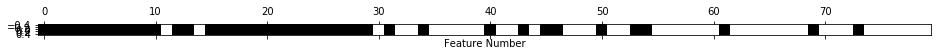

In [59]:
mask = select.get_support()
# Black for True, White for False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Number")

* RandomForestClassifier를 사용한 SelectFromModel이 선택한 특성
* 두 개를 제외한 모든 원본 특성 선택됨!
* 성능 확인해봅시다!

In [60]:
x_test_l1 = select.transform(x_test)
score = LogisticRegression().fit(x_train_l1, y_train).score(x_test_l1, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.951


### * Iterative Selection (반복적 선택)
* 특성 수가 각기 다른 일련의 모델이 만들어짐

	* 특성을 하나도 선택하지 않은 상태로 시작해 어떤 종료 조건에 도달할 때까지 하나씩 추가하는 방법
	* 모든 특성을 가지고 시작해 어떤 종료 조건이 될 때까지 특성을 하나씩 제거해가는 방법 (RFE, Recursive Feature Elimination)

Text(0.5,0,'Feature Number')

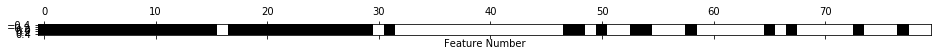

In [63]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(x_train, y_train)
# 선택한 특성 표시
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Number")

In [64]:
x_train_rfe = select.transform(x_train)
x_test_rfe = select.transform(x_test)

score = LogisticRegression().fit(x_train_rfe, y_train).score(x_test_rfe, y_test)
print("Test Score: {:.3f}".format(score))

Test Score: 0.951


In [65]:
print("Test Score: {:.3f}".format(select.score(x_test, y_test)))

Test Score: 0.951


* RFE 안에 있는 RandomForest의 성능이 이 모델에서 선택한 특성으로 만든 Logistic Regression의 성능과 동일
* 특성 선택만 제대로 된다면, 선형 모델의 성능은 RandomForest의 성능과 견줄 만하다!

### Expert Knowledge


In [66]:
citibike = mglearn.datasets.load_citibike()
print("Citybike Data:\n{}".format(citibike.head()))

Citybike Data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0,0.5,'Rental Times')

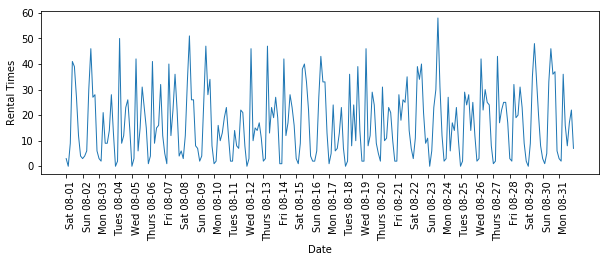

In [68]:
# 8월 한 달 동안의 대여 횟수
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"]
xticks_name = [week[int(w)] + d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rental Times")

* 입력 특성: 날짜 & 시간
* 출력: 연속된 세 시간 동안의 대여 횟수

In [69]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10 ** 9 로 나누어 변환
x = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [77]:
# First 184 data points for Train set, rest for Test set
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프
def eval_on_features(features, target, regressor):
    # Split into Train set and Test set
    x_train, x_test = features[:n_train], features[n_train:]
    # Split Target Value
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(x_train, y_train)
    print("Test set R^2: {:.2f}".format(regressor.score(x_test, y_test)))
    y_pred = regressor.predict(x_test)
    y_pred_train = regressor.predict(x_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(x), 8), xticks_name, rotation=90, ha="left")
    
    plt.plot(range(n_train), y_train, label="Train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="Test")
    plt.plot(range(n_train), y_pred_train, '--', label="Train Prediction")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="Test Prediction")
    plt.legend(loc=(1.01, 0))
    plt.ylabel("Rental Times")

Test set R^2: -0.04


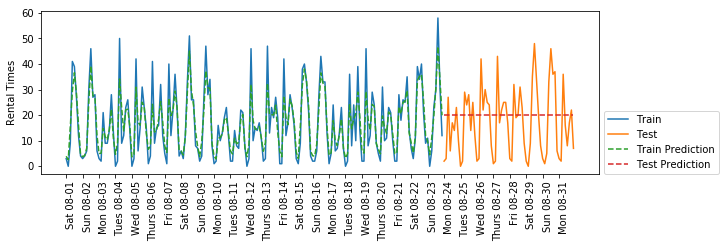

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(x, y, regressor)

* POSIX 시간만 사용하여 만든 랜덤 포레스트의 예측

##### * R^2 == -0.4 -> 거의 아무것도 학습되지 않았다!!

* 랜덤 포레스트와 특성 사이의 조합에 문제
* 테스트 세트에 있는 데이터 포인트는 훈련 세트에 있는 특성 값의 범위 밖에 있다. (test set가 train set보다 뒤의 시간)
* 랜덤 포레스트는 train set에 있는 특성의 범위 밖으로 Extrapoloation(외삽) 불가!
* => 시간과 요일 데이터를 활용!

Test set R^2: 0.60


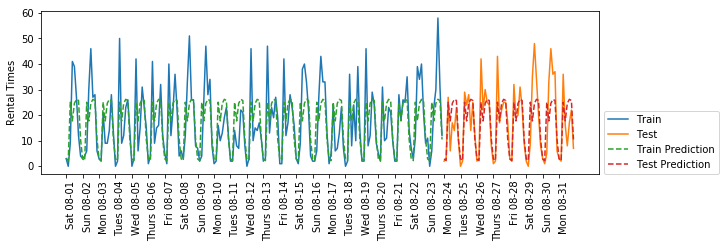

In [83]:
# 시간 정보 추가
x_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(x_hour, y, regressor)

Test set R^2: 0.84


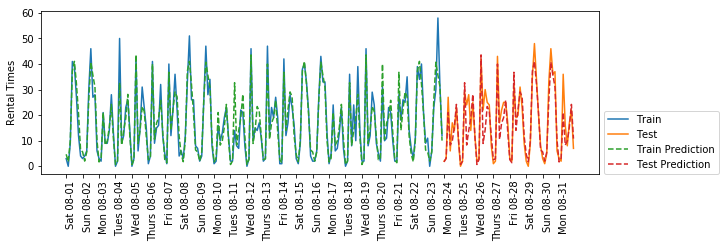

In [84]:
# 요일 정보 추가
x_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(x_hour_week, y, regressor)

* 요일별, 시간별 평균 대여 횟수를 학습

Test set R^2: 0.13


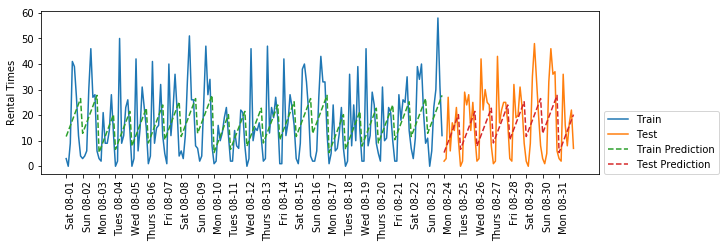

In [85]:
# Linear Regression 적용해봅시다!
from sklearn.linear_model import LinearRegression
eval_on_features(x_hour_week, y, LinearRegression())

* ㅆㄹㄱ야!
* 요일과 시간이 정수로 인코딩되어 있어서 연속형 변수로 해석되기 때문
* OneHotEncoder를 사용하여 정수형을 범주형 변수로 해석해봅시다!

Test set R^2: 0.62


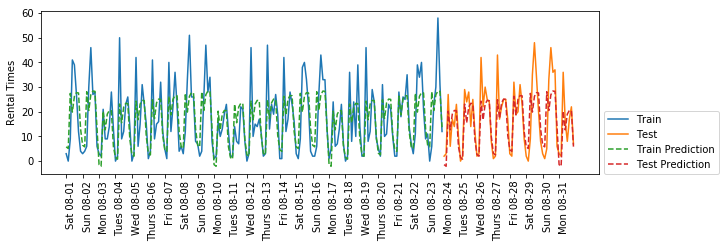

In [86]:
enc = OneHotEncoder()
x_hour_week_onehot = enc.fit_transform(x_hour_week).toarray()

eval_on_features(x_hour_week_onehot, y, Ridge())

Test set R^2: 0.85


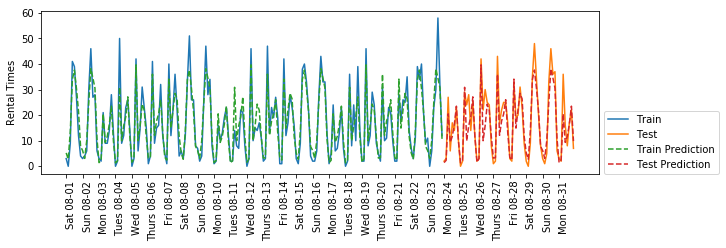

In [87]:
# 상호작용 특성을 사용해 시간와 요일의 조합별 계수를 학습시켜 봅시다!
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_hour_week_onehot_poly = poly_transformer.fit_transform(x_hour_week_onehot)
lr = Ridge()
eval_on_features(x_hour_week_onehot_poly, y, lr)

* 무엇이 학습되었는지 명확하다는 점에서 good
* 이 모델이 학습한 계수를 그래포로 나타내봅시다!

In [89]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0,0.5,'Coef Size')

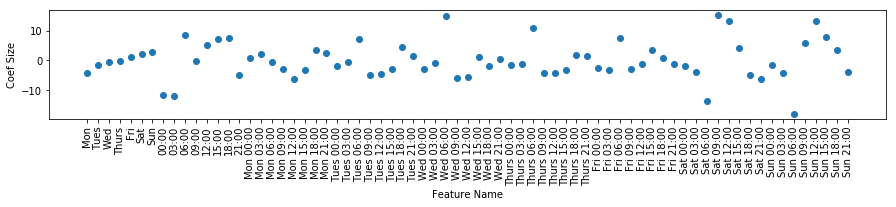

In [91]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Coef Size")

# Done